In [ ]:
#Importação das bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from PIL import Image
import os

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Codigo para comprar as imagens
def return_intersection(hist_1, hist_2):
  #pegar todos valores da primeira coluna, todos da segunda
  #3 da tercera assim tereis os 3 shapes iguais
  min = np.minimum(hist_1[:,:,2], hist_2[:,:,2])
  instersection = np.true_divide(np.sum(min), np.sum(hist_2))
  return instersection

In [ ]:
#Codigo para comprar as imagens
def return_intersectionBW(hist_1, hist_2):
  #pegar todos valores da primeira coluna, todos da segunda
  #3 da tercera assim tereis os 3 shapes iguais
  min = np.minimum(hist_1[:,], hist_2[:,])
  instersection = np.true_divide(np.sum(min), np.sum(hist_2))
  return instersection

In [ ]:
#Codigo para comprar as imagens
def return_intersectionCLF(hist_1, hist_2):
  #pegar todos valores da primeira coluna, todos da segunda
  #3 da tercera assim tereis os 3 shapes iguais
  min = np.minimum(hist_1, hist_2)
  instersection = np.true_divide(np.sum(min), np.sum(hist_2))
  return instersection

In [ ]:
def convertValues(image):
  for i in range(len(image)):
    for j in range(len(image[i])):
      if image[i][j] <= 30:
        image[i][j] = 255
  return image

In [ ]:
def clearImage(image):
  for i in range(len(image)):
    for j in range(len(image[0])):
      if image[i][j] >= image[i].max():
        image[i][j] = image[i].max()
  return image

In [ ]:
def monoColor(image):
  for i in range(len(image)):
    for j in range(len(image[0])):
      if image[i][j] >= 126:
        image[i][j] = 0
      else:
        image[i][j] = 255
      
  return image

In [ ]:
#reduzir tamanho da imagem
def resizeImage(inputDir, outputDir):
  arqList = os.listdir(inputDir)
  tamanho = len(arqList)
  for i in range(tamanho):
    imagem = Image.open(os.path.join(inputDir, arqList[i]))
    redinImage = imagem.resize((400,400))#largura altura
    redinImage.save(os.path.join(outputDir, arqList[i]))
  return tamanho

In [ ]:
#dir2 = "/content/drive/MyDrive/Ifes/2022 2/Processamento Digital de Imagens/Base2/"
#tamanho = resizeImage(dir2, "/content/drive/MyDrive/Ifes/2022 2/Processamento Digital de Imagens/BaseExit")

In [ ]:
def colorDivision(image, image2):
  ImageRed = image.copy()
  ImageRed[:,:,1] = 0
  ImageRed[:,:,2] = 0

  ImageRed2 = image2.copy()
  ImageRed2[:,:,1] = 0
  ImageRed2[:,:,2] = 0

  ImageGreen = image.copy()
  ImageGreen[:,:,0] = 0
  ImageGreen[:,:,2] = 0

  ImageGreen2 = image2.copy()
  ImageGreen2[:,:,0] = 0
  ImageGreen2[:,:,2] = 0

  ImageBlue = image.copy()
  ImageBlue[:,:,0] = 0
  ImageBlue[:,:,1] = 0

  ImageBlue2 = image2.copy()
  ImageBlue2[:,:,0] = 0
  ImageBlue2[:,:,1] = 0
  return ImageRed, ImageRed2, ImageGreen, ImageGreen2, ImageBlue, ImageBlue2

In [ ]:
def probabilityBasedColor(ImageRed, ImageRed2, ImageGreen, ImageGreen2, ImageBlue, ImageBlue2):
  NImageRed = return_intersection(ImageRed, ImageRed2)
  NImageGreen = return_intersection(ImageGreen, ImageGreen2)
  NImageBlue = return_intersection(ImageBlue, ImageBlue2)
  Compatibility = (NImageRed + NImageGreen*5 + NImageBlue*2)/8
  return Compatibility

In [ ]:
#separa lista em 2, os quens e os super herois
def fsplitHeroes(heroesList):
  heroes = []
  quem = []
  for name in (heroesList):
    if name[0:4].upper() == "QUEM":
      quem.append(name)
    else:
      heroes.append(name)
  return quem, heroes#[1:len(heroes)]

In [ ]:
def resizeImage2():
  proximo = os.listdir("/content/drive/MyDrive/Ifes/2022 2/Processamento Digital de Imagens/MinhaBase/Saida")
  quens,splitHeroes = fsplitHeroes(proximo)
  return quens,splitHeroes

In [ ]:
# colocar a informação acima como uma das informações relevantes porem com um peso menor do que o codigo abaixo
# limpar as imagens para otimizar o codigo abaixo

In [ ]:
def desempate(lista,resultado,quem,hero):
  #apos subir com o estado atual do resultado e dos herois teria que ter subido a localização tambem
  #em resultados tem todos resultados da predição para aquele dado QUEM
  ultimoMaior = lista[len(lista)-1]
  maior = lista[0]
  pc=0
  pc2=1
  for i in range(2,len(lista)):
    if lista[i] > maior :
        maior = lista[i]
        pc=i
    else:
      if  ultimoMaior < lista[i]:
        ultimoMaior = lista[i]
        pc2=i
  diferenca =  ((maior - ultimoMaior)*100)
  if ((diferenca) >= 1) and ((diferenca) <= 5):
    lista[pc]=trocaValor(diferenca,lista,pc,pc2,quem,hero)
  return lista

In [ ]:
def trocaValor(diferenca,lista,pc,pc2,quem,hero):
  modification = betterPrecision(quem,hero)
  return modification

In [ ]:
def betterPrecision(quem,Hero):
  imageMod = cv.imread("/content/drive/MyDrive/Ifes/2022 2/Processamento Digital de Imagens/MinhaBase/Saida/"+quem)
  imageModif = convertValues(imageMod[:,:,2])
  imageModif = clearImage(imageModif)
  imageModif = monoColor(imageModif)
  for herois in Hero:
    imageMod2 = cv.imread("/content/drive/MyDrive/Ifes/2022 2/Processamento Digital de Imagens/MinhaBase/Saida/"+herois)
    imageModif2 = convertValues(imageMod2[:,:,2])
    imageModif2 = clearImage(imageModif2)
    imageModif2 = monoColor(imageModif2)
    resultado2 = return_intersectionBW(imageModif, imageModif2)
    #print("Quem" , quem[4:len(quem)] ,  "Hero: " ,herois ," : " , (resultado2)*100)

  return resultado2

In [ ]:
def proba(lista):
  valor=0
  maior = lista[0]
  for i in range(1,len(lista)):
    if lista[i] > maior:
      maior = lista[i]
  for i in range(0,len(lista)):
    valor += (lista[i]/maior)
  for i in range(0,len(lista)):
    lista[i]= ((lista[i]/maior)/valor)*100
  return lista

In [ ]:
def printGraph(probabilidades,quens,subtitle_string):
  for i in range(len(probabilidades)):
    plt.title(quens[i])
    plt.suptitle(subtitle_string, y=1.05, fontsize=9)
    y = probabilidades[i]
    N = (len(y))
    x=range(N)
    width =0.5
    plt.barh(x, y, width, color="red")
    plt.show()

In [ ]:
def makeHist(img):
  colours = ('b','g', 'r')

  for i, col in enumerate(colours):
    hist = cv.calcHist([img], [i], None, [256], [0,256])
  
  return hist

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


Probabilidades


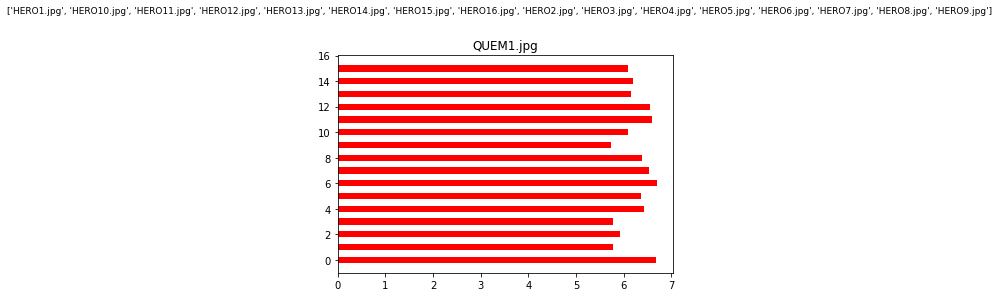

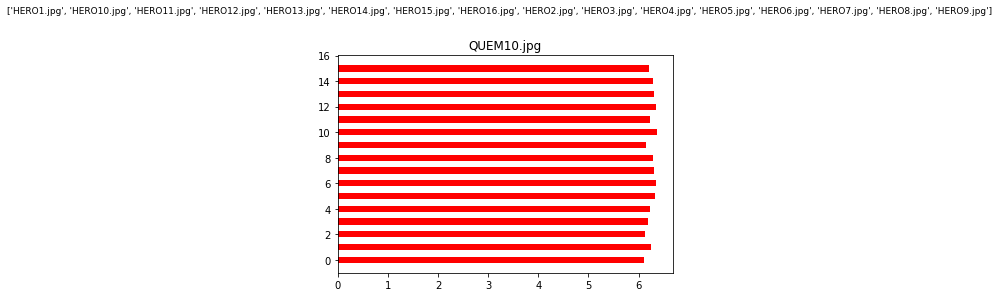

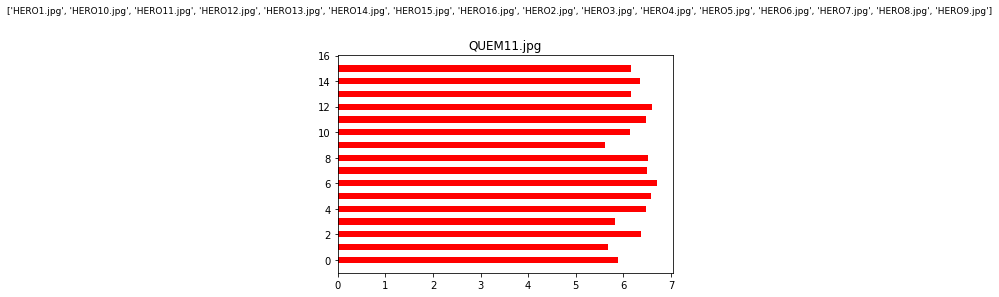

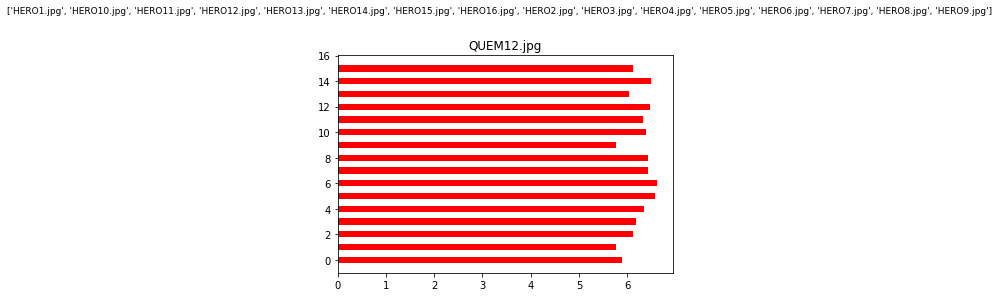

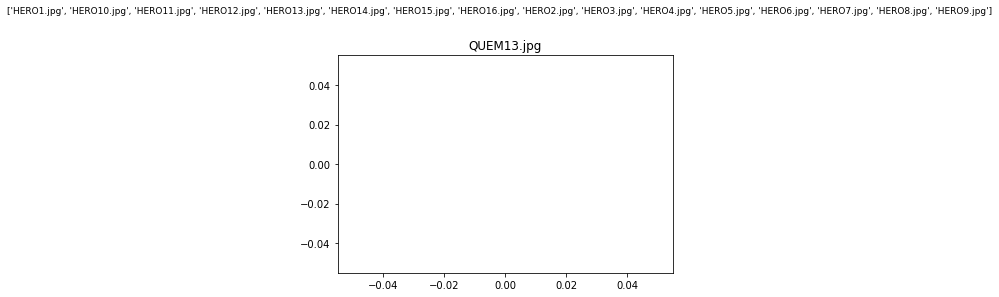

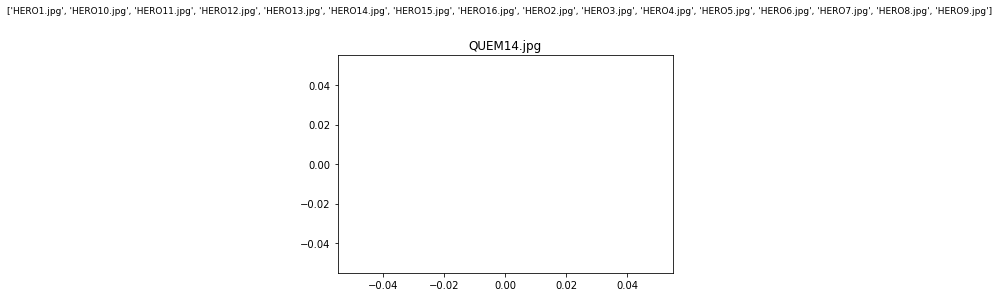

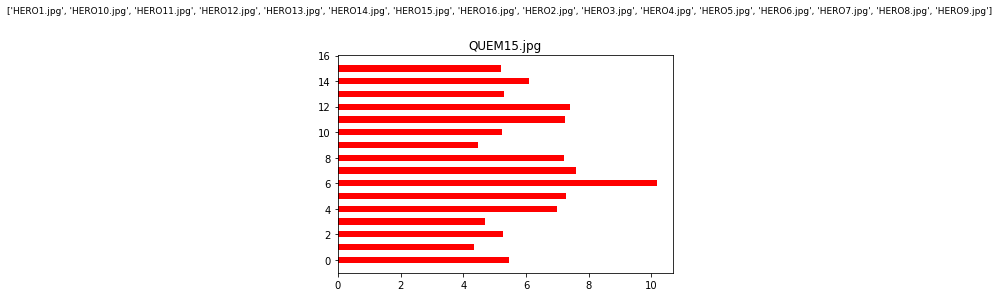

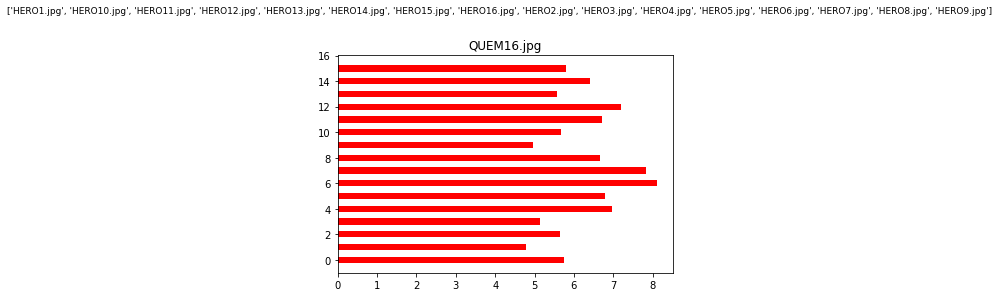

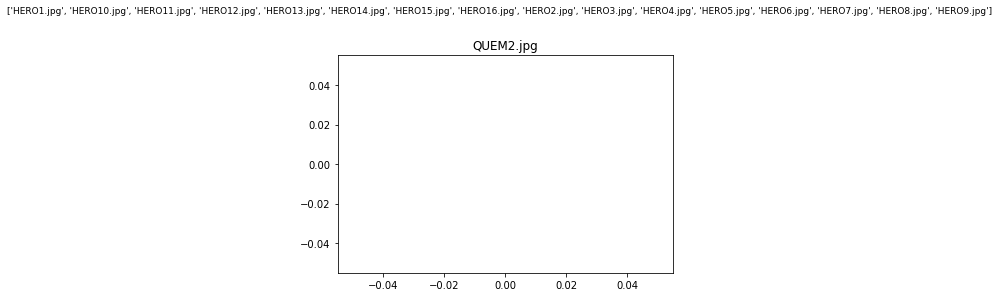

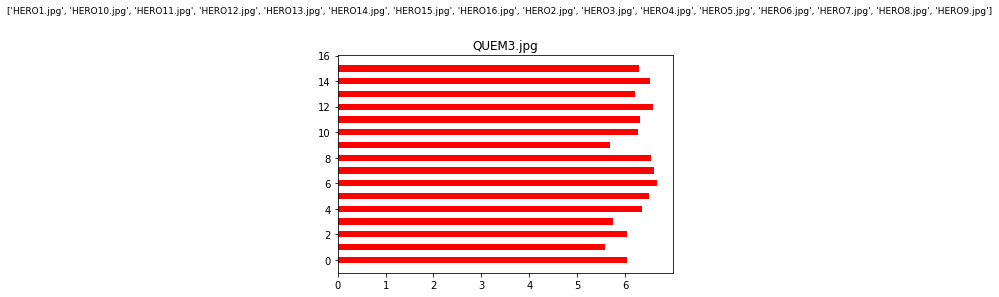

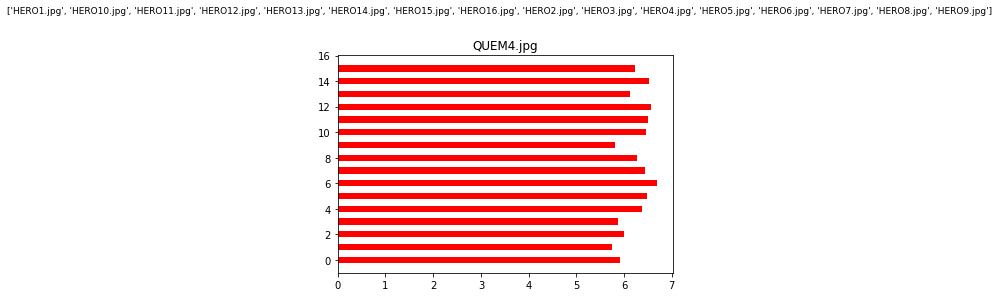

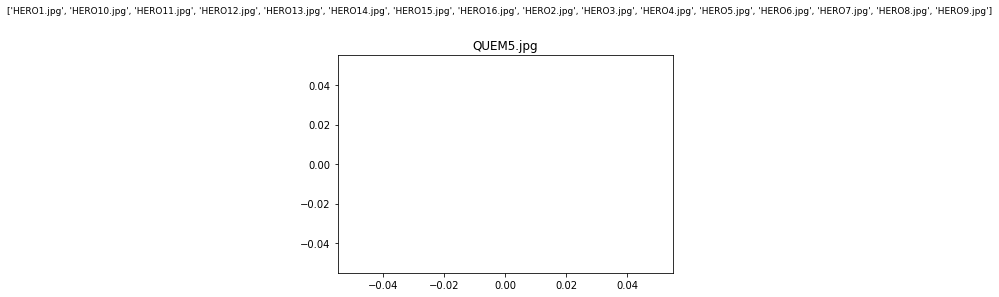

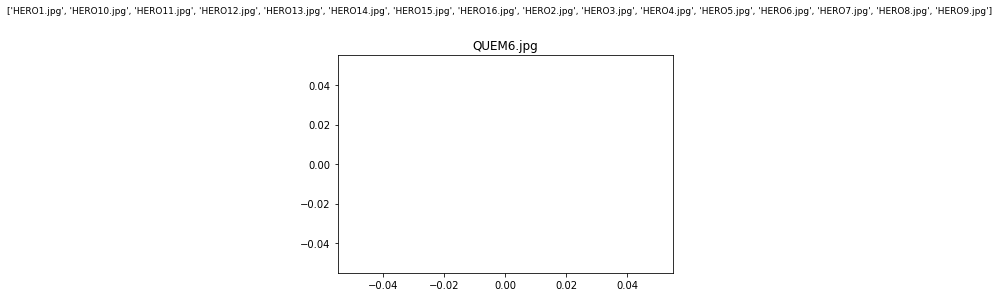

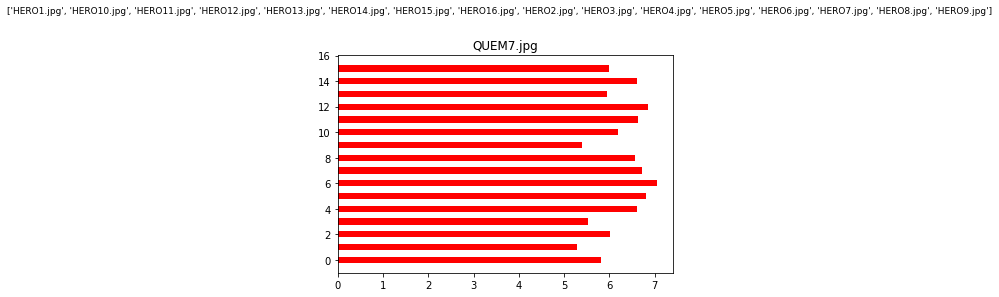

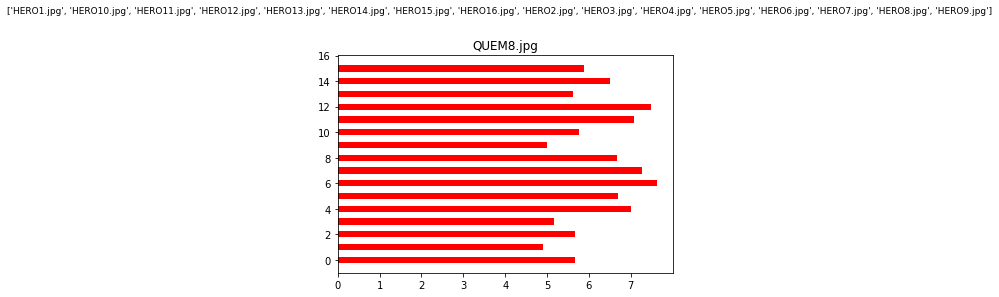

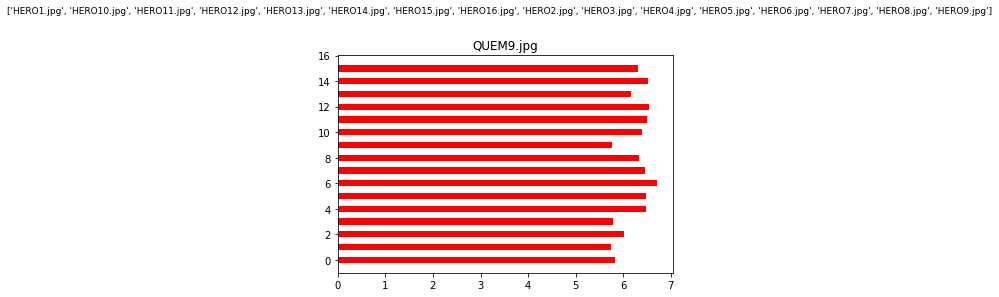

ProbabilidadesCLF


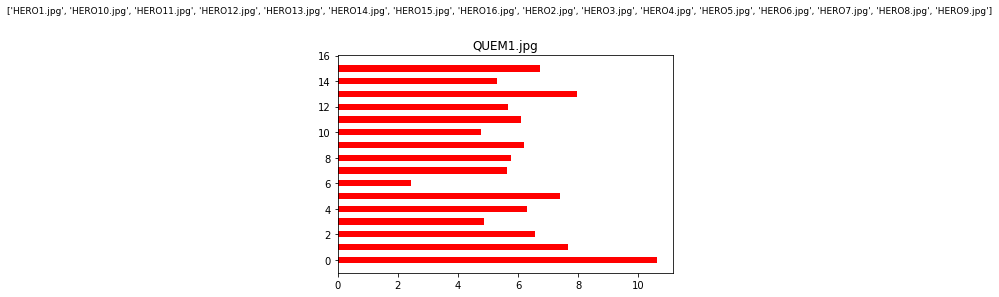

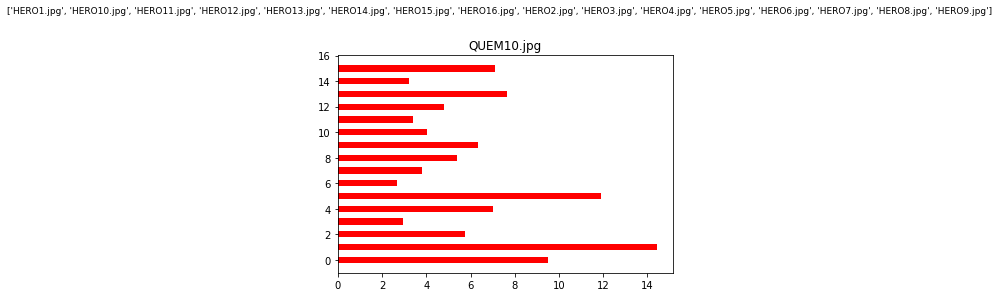

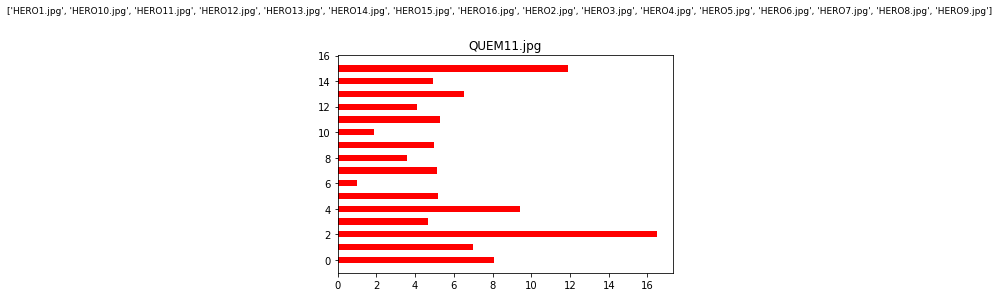

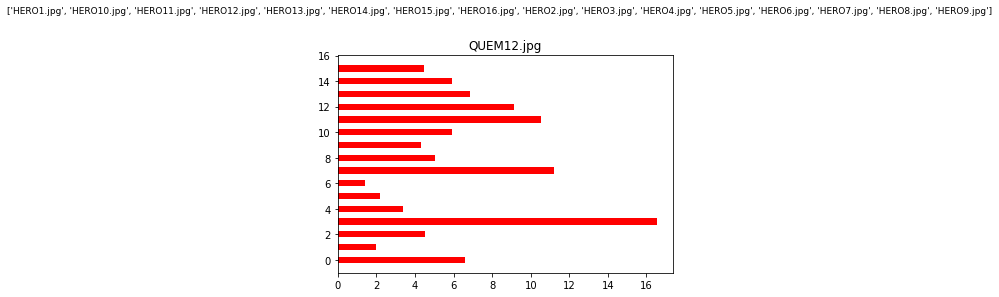

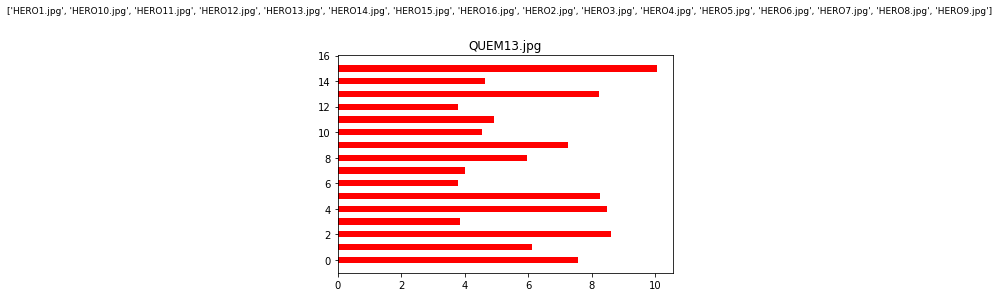

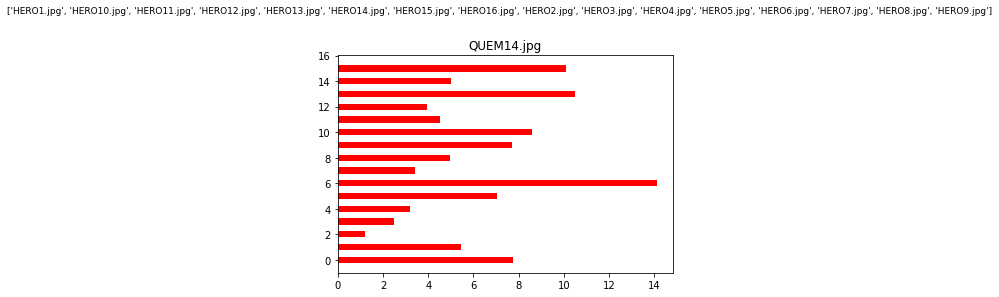

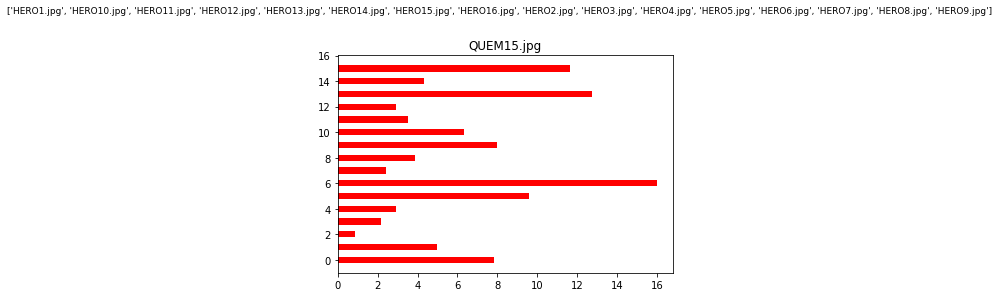

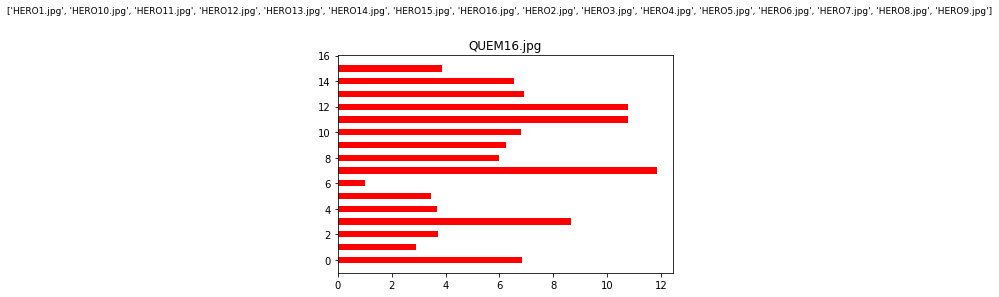

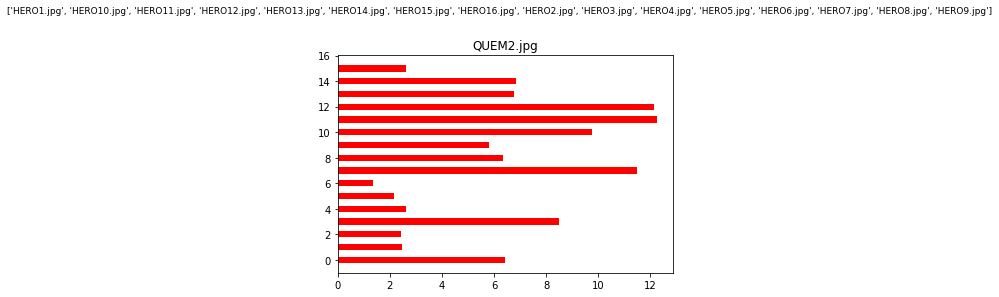

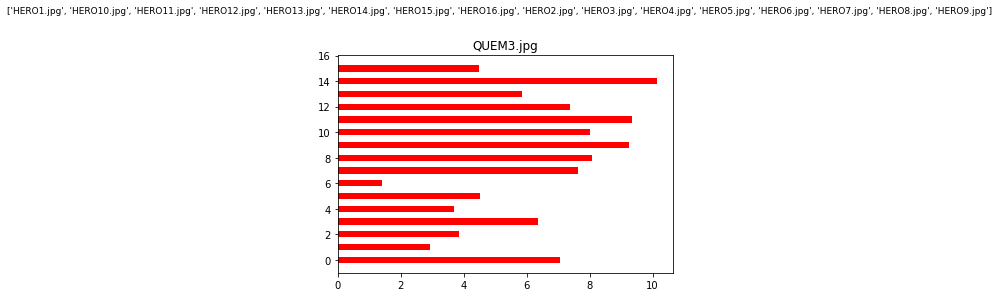

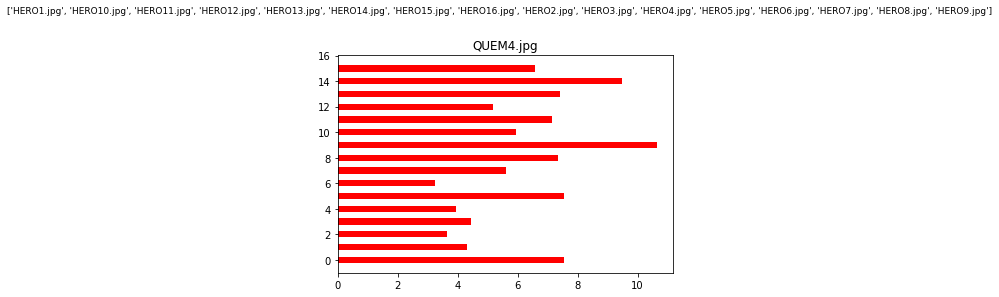

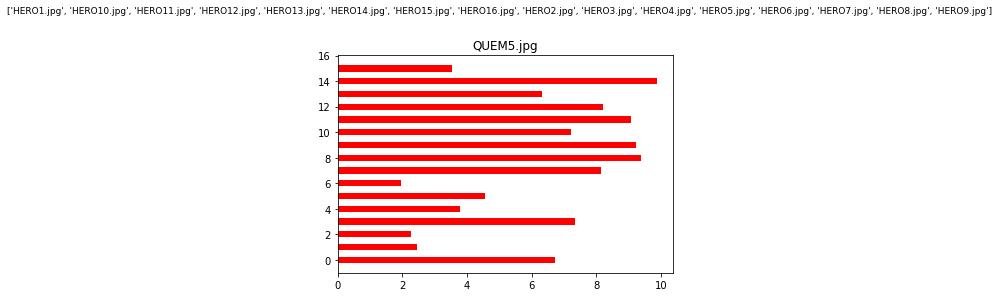

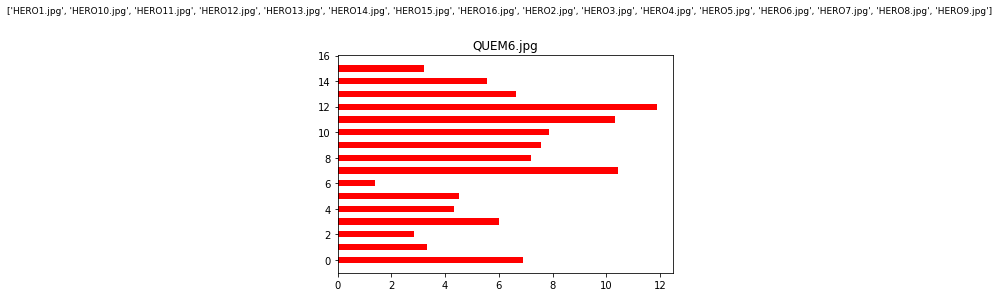

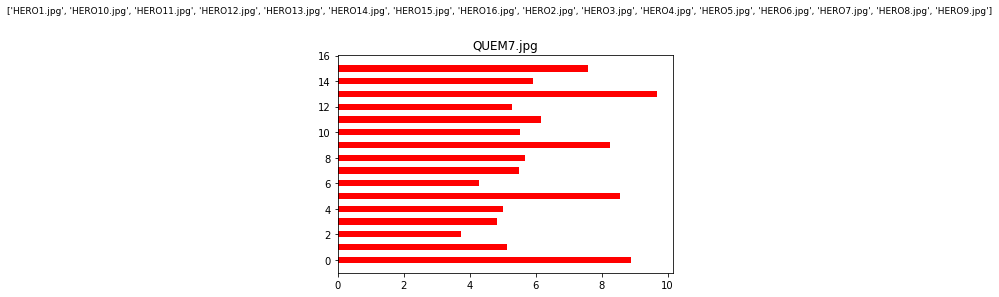

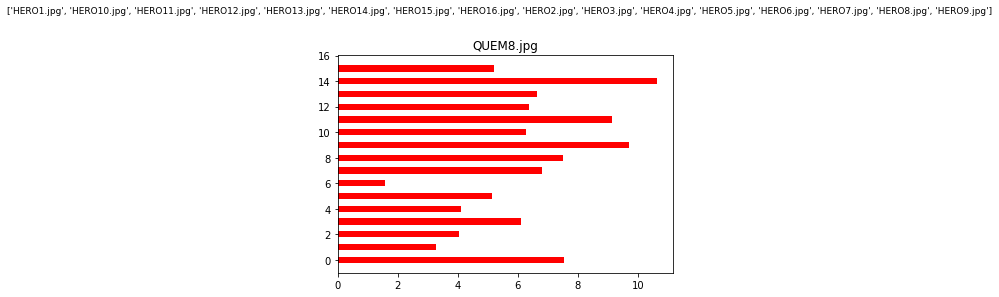

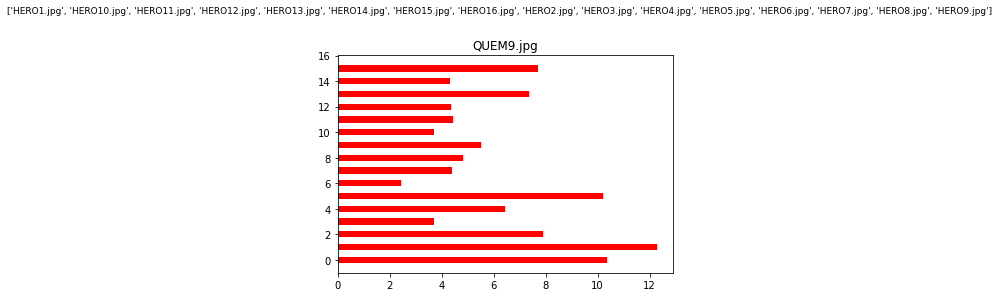

In [ ]:
def main():
  probabilidades = []
  casoBase = []
  resultCV=[]
  allResults=[]
  probabilidadesCLF=[]

  origem = "/content/drive/MyDrive/Ifes/2022 2/Processamento Digital de Imagens/MinhaBase/Entrada"
  destino = "/content/drive/MyDrive/Ifes/2022 2/Processamento Digital de Imagens/MinhaBase/Saida"
  resizeImage(origem, destino)
  proximo = os.listdir("/content/drive/MyDrive/Ifes/2022 2/Processamento Digital de Imagens/MinhaBase/Saida")
  quens,splitHeroes = fsplitHeroes(proximo)
  quens.sort()
  splitHeroes.sort()
  destino = os.listdir("/content/drive/MyDrive/Ifes/2022 2/Processamento Digital de Imagens/MinhaBase/Saida")
  for quem in quens:
    imageCV = makeHist(cv.imread("/content/drive/MyDrive/Ifes/2022 2/Processamento Digital de Imagens/MinhaBase/Saida/"+quem))
    image = plt.imread("/content/drive/MyDrive/Ifes/2022 2/Processamento Digital de Imagens/MinhaBase/Saida/"+quem)

    for Hero in splitHeroes:
      image2 = plt.imread("/content/drive/MyDrive/Ifes/2022 2/Processamento Digital de Imagens/MinhaBase/Saida/"+Hero)
      imageCV2 = makeHist(cv.imread("/content/drive/MyDrive/Ifes/2022 2/Processamento Digital de Imagens/MinhaBase/Saida/"+Hero))

      images = colorDivision(image, image2)#verificar como tirar a parte preta e colocar branca
      resultado = probabilityBasedColor(images[0], images[1], images[2], images[3], images[4], images[5])
      
      #print("Quem" , quem[4:5] ,  "Hero: " ,Hero ," : " , (resultado)*100)

      casoBase.append(resultado)
      intersection = return_intersectionCLF(imageCV,imageCV2)
      resultCV.append(intersection)
    resultadoBW=resultado.copy()
    resultado=desempate(casoBase,resultadoBW,quem,splitHeroes)#Pegar o valor de retorno e substituir na posição do valor a ser trocado

    allResults.append(resultCV)
    resultCV=[]
    casoBase = []
    resu = proba(allResults[0])
    allResults=[]
    probabilidades.append(proba(resultado))#caso seja necessario fazer a troca de valor passa a valer o da nova predição
    probabilidadesCLF.append(resu)
  
  print("Probabilidades")
  printGraph(probabilidades, quens,splitHeroes)
  print("ProbabilidadesCLF")
  printGraph(probabilidadesCLF, quens, splitHeroes)
if __name__ == "__main__":
    main()

Taxa de acertou 62.5%
Quem 7 = Mulher Maravilha
Quem 14 = Flash [acertou]
Quem 10 = Cap America [acertou] mas duvida com o super
Quem 09 = Batman
Quem 16 = Flash[acertou]
Quem 11 = batman
Quem 13 = maravilha
Quem 12 = maravilha [acertou]
Quem 15 = flash [acertou]
Quem 6 = Ferro[acertou]
Quem 8 = Batman
Quem 4 = Batman[acertou]
Quem 1 = Hulk[acertou]
Quem 3 = Ferro
Quem 5 = Maravilha[acertou]
Quem 2 = Volverine[acertou]


Taxa de acertou 62.5%

Matplotlib
Quem 7 = Mulher Maravilha[Errou]
Quem 14 = Flash [Errou]
Quem 10 = Cap America [Errou] mas duvida com o super
Quem 09 = Batman [Errou] 
Quem 16 = Flash[acertou]
Quem 11 = batman[Errou]
Quem 13 = maravilha[acertou]
Quem 12 = maravilha [Errou]
Quem 15 = flash [acertou]
Quem 6 = Ferro[Errou]
Quem 8 = Batman[Errou]
Quem 4 = Batman[Errou]
Quem 1 = Hulk[acertou]
Quem 3 = Ferro[Errou]
Quem 5 = Maravilha[Errou]
Quem 2 = Volverine[acertou]
5/16 = 31.25

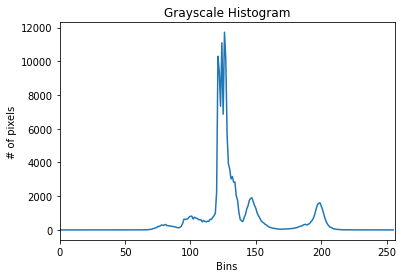

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
img = cv.imread("/content/drive/MyDrive/Ifes/2022 2/Processamento Digital de Imagens/MinhaBase/Saida/HERO15.jpg")

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#GRayscale histogram
gray_hist = cv.calcHist([gray], [0], None, [256], [0,256])

plt.figure()
plt.title('Grayscale Histogram')
plt.xlabel('Bins')
plt.ylabel('# of pixels')
plt.plot(gray_hist)
plt.xlim([0,256])
plt.show()

plt.figure(0)

Printar os graficos dos que deram problema

In [ ]:
# import the necessary packages
from scipy.spatial import distance as dist
import matplotlib.pyplot as plt
import numpy as np
import argparse
import glob
import cv2 as cv
from google.colab.patches import cv2_imshow

In [ ]:
#opening the image
imageCV = cv.imread("/content/drive/MyDrive/Ifes/2022 2/Processamento Digital de Imagens/MinhaBase/Entrada/HERO1.jpg")
cv2_imshow(imageCV)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Blur
blur = cv.GaussianBlur(imageCV, (7,7), cv.BORDER_DEFAULT)
cv2_imshow(blur)

In [ ]:
#Edge Cascasde
canny = cv.Canny(imageCV, 125, 175)
cv2_imshow(canny)

In [ ]:
dilated = cv.dilate(canny, (7,7), iterations = 3)
cv2_imshow(dilated)

In [ ]:
#eroding
eroded = cv.erode(dilated, (7,7), iterations=3)
cv2_imshow(eroded)

In [ ]:
#resize
resized = cv.resize(imageCV, (500,500), interpolation=cv.INTER_CUBIC)
cv2_imshow(resized)

In [ ]:
#CROPPING
cropped = imageCV[50:200, 200:400]
cv2_imshow(cropped)

In [ ]:
# Converting to grayscale
gray = cv.cvtColor(imageCV, cv.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [ ]:
def translate(img, x,y):
  transMat = np.float32([[1,0,x],[0,1,y]])
  dimensions = (img.shape[1], img.shape[0])
  return cv.warpAffine(img, transMat, dimensions)

In [ ]:
# -x -> left
# -y -> up
# x -> Right
# y -> Down
translated = translate(imageCV,50, -50)
cv2_imshow(translated)

In [ ]:
#Rotation
def rotate(img, angle, rotPoint = None):
  (height,width) = img.shape[:2]
  if rotPoint is None:
    rotPint = (width//2,height//2)
  rotMat = cv.getRotationMatrix2D(rotPoint, angle, 1.0)
  dimensions = (width, height)
  return cv.warpAffine(img, rotMat, dimensions)

In [ ]:
rotated = rotate(imageCV, 5)
cv2_imshow(rotated)
rotated_rotated = rotate(rotated,10)
cv2_imshow(rotated_rotated)

In [ ]:
risized = cv.resize(imageCV, (500,300), interpolation=cv.INTER_CUBIC)
cv2_imshow(risized)

In [ ]:
flip = cv.flip(imageCV, 1)
cv2_imshow(flip)
flip = cv.flip(imageCV, -1)
cv2_imshow(flip)

In [ ]:
cropped = imageCV[200:400, 300:400]
cv2_imshow(cropped)

In [ ]:
gray = cv.cvtColor(imageCV, cv.COLOR_BGR2GRAY)
cv2_imshow(gray)

canny = cv.Canny(imageCV, 125, 175)
cv2_imshow(canny)

contors, hierarchies = cv.findContours(canny, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
print(f'{len(contors)} countous(s) foudn')

In [ ]:
gray = cv.cvtColor(imageCV, cv.COLOR_BGR2GRAY)
cv2_imshow(gray)

blur = cv.GaussianBlur(gray, (5,5), cv.BORDER_DEFAULT)
cv2_imshow(blur)

canny = cv.Canny(blur, 125, 175)
cv2_imshow(canny)
contors, hierarchies = cv.findContours(canny, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
print(f'{len(contors)} countous(s) foudn')

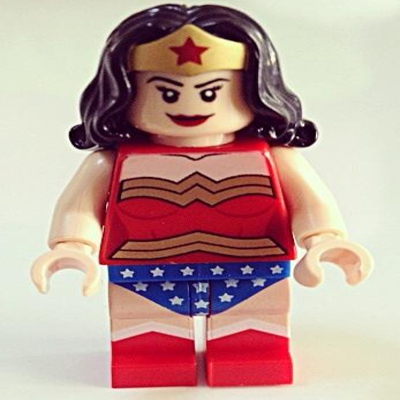

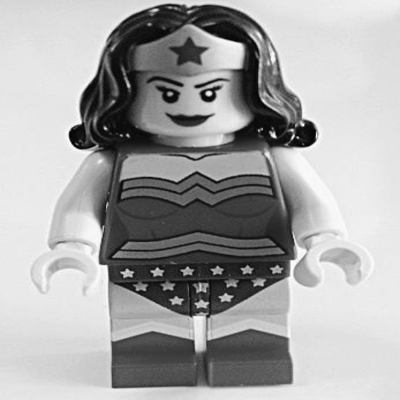

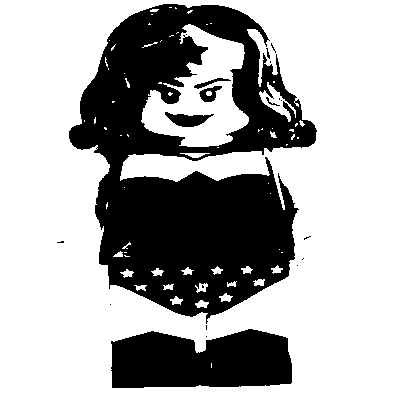

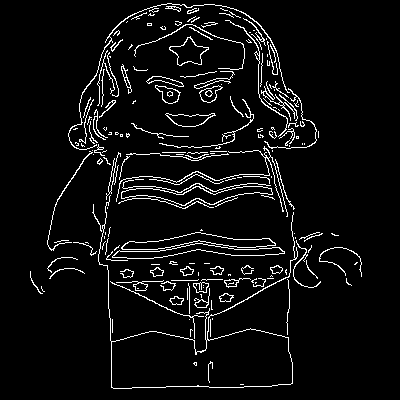

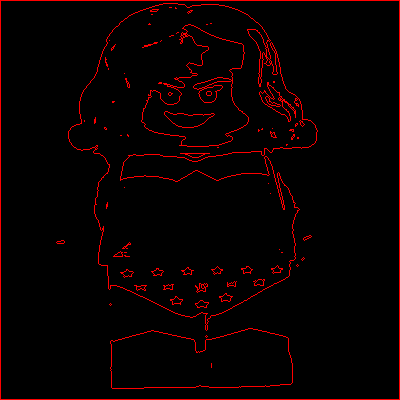

95 countous(s) foudn


In [ ]:
#opening the image
img = cv.imread("/content/drive/MyDrive/Ifes/2022 2/Processamento Digital de Imagens/BaseExit/Maravilha.png")
cv2_imshow(img)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(gray)

ret, thresh = cv.threshold(gray, 125, 255, cv.THRESH_BINARY)
cv2_imshow(thresh)

canny = cv.Canny(gray, 125, 175)
cv2_imshow(canny)

contors, hierarchies = cv.findContours(thresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
blank = np.zeros(img.shape, dtype ='uint8')

cv.drawContours(blank, contors, -1, (0,0,255), 1)

cv2_imshow(blank)
print(f'{len(contors)} countous(s) foudn')

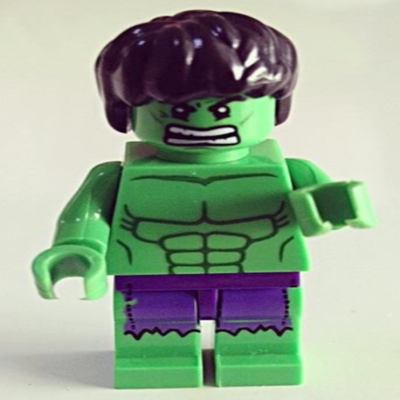

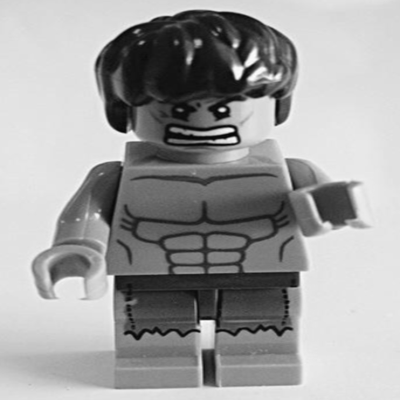

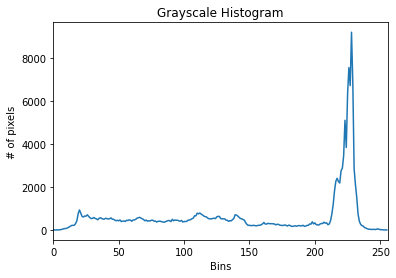

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
img = cv.imread("/content/drive/MyDrive/Ifes/2022 2/Processamento Digital de Imagens/BaseExit/Hulk.png")
cv2_imshow(img)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(gray)

#GRayscale histogram
gray_hist = cv.calcHist([gray], [0], None, [256], [0,256])

plt.figure()
plt.title('Grayscale Histogram')
plt.xlabel('Bins')
plt.ylabel('# of pixels')
plt.plot(gray_hist)
plt.xlim([0,256])
plt.show()

plt.figure(0)

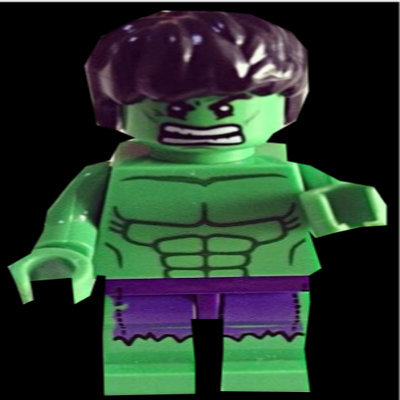

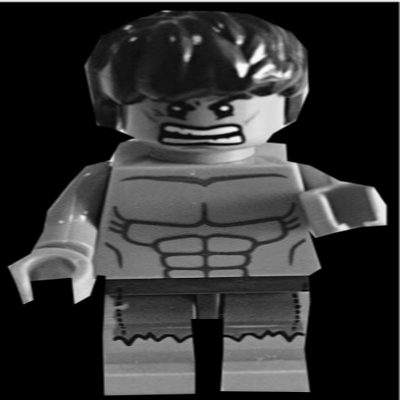

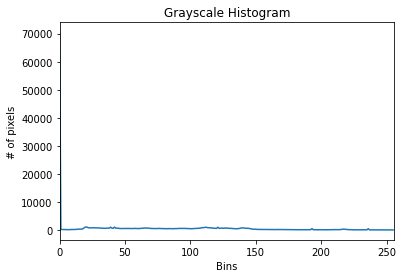

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
img = cv.imread("/content/drive/MyDrive/Ifes/2022 2/Processamento Digital de Imagens/BaseExit/QUEM1.png")
cv2_imshow(img)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(gray)

#GRayscale histogram
gray_hist = cv.calcHist([gray], [0], None, [256], [0,256])

plt.figure()
plt.title('Grayscale Histogram')
plt.xlabel('Bins')
plt.ylabel('# of pixels')
plt.plot(gray_hist)
plt.xlim([0,256])
plt.show()

plt.figure(0)

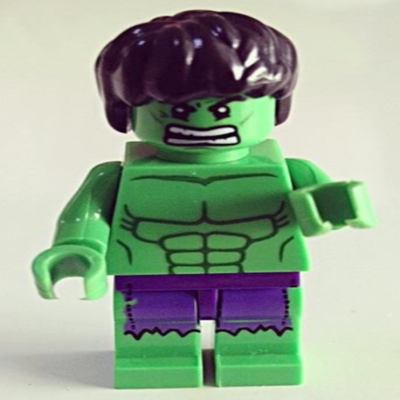

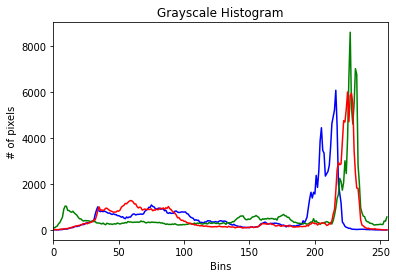

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
# colour histagram
img = cv.imread("/content/drive/MyDrive/Ifes/2022 2/Processamento Digital de Imagens/BaseExit/Hulk.png")
cv2_imshow(img)


#GRayscale histogram

blank = np.zeros(img.shape[:2], dtype='uint8')

#mask = cv.circle(blank, (img.shape[1]//2, img.shape[0]//2),100, 255, -1)

#masked = cv.bitwise_and(img, img, mask = mask)
#cv2_imshow(masked)

#gray_hist = cv.calcHist([gray], [0], mask, [256], [0,256])

plt.figure()
plt.title('Grayscale Histogram')
plt.xlabel('Bins')
plt.ylabel('# of pixels')
colours = ('b','g', 'r')

for i, col in enumerate(colours):
  hist1 = cv.calcHist([img], [i], None, [256], [0,256])
  plt.plot(hist1, color=col)
  plt.xlim([0,256])

plt.show()
plt.figure(0)

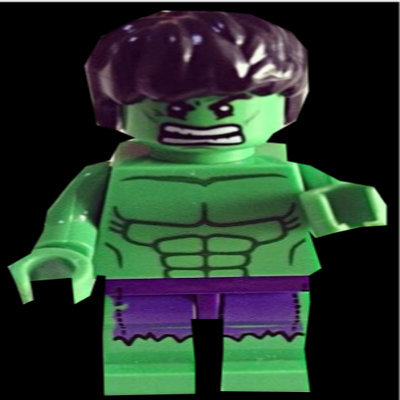

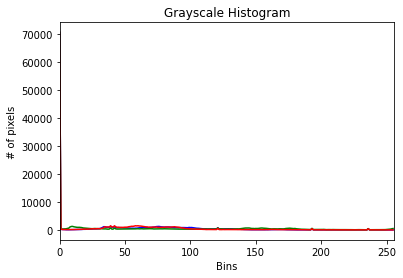

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
# colour histagram
img = cv.imread("/content/drive/MyDrive/Ifes/2022 2/Processamento Digital de Imagens/BaseExit/QUEM1.png")
cv2_imshow(img)


#GRayscale histogram

blank = np.zeros(img.shape[:2], dtype='uint8')

#gray_hist = cv.calcHist([gray], [0], mask, [256], [0,256])

plt.figure()
plt.title('Grayscale Histogram')
plt.xlabel('Bins')
plt.ylabel('# of pixels')
colours = ('b','g', 'r')

for i, col in enumerate(colours):
  hist2 = cv.calcHist([img], [i], None, [256], [0,256])
  plt.plot(hist2, color=col)
  plt.xlim([0,256])
plt.show()
plt.figure(0)

In [ ]:
return_intersectionCLF(hist1,hist2)

0.48339376

In [ ]:
#Agora sabendo a ordem das imagens irei converter todas elas para esse formato e depois fazer os histogramas
dir = "/content/drive/MyDrive/Ifes/2022 2/Processamento Digital de Imagens/Base1/"
resizeImage(dir, "/content/drive/MyDrive/Ifes/2022 2/Processamento Digital de Imagens/BaseExit")

13

In [ ]:
#Carregamento da imagem
image = cv.imread("/content/drive/MyDrive/Ifes/2022 2/Processamento Digital de Imagens/BaseExit/America.png",0)
image2 = cv.imread("/content/drive/MyDrive/Ifes/2022 2/Processamento Digital de Imagens/BaseExit/super.png",0)

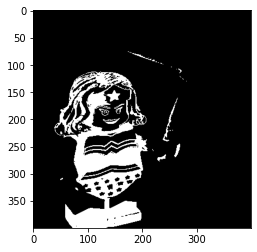

In [ ]:
image = cv.imread("/content/drive/MyDrive/Ifes/2022 2/Processamento Digital de Imagens/BaseExit/QUEM5.png",0)
image = convertValues(image)
image = monoColor(image)
plt.imshow(image, cmap='gray')

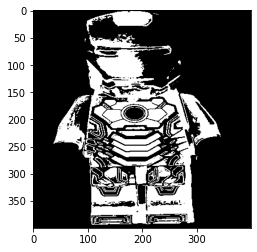

In [ ]:
image2 = cv.imread("/content/drive/MyDrive/Ifes/2022 2/Processamento Digital de Imagens/BaseExit/Ferro.png",0)
image2 = convertValues(image2)
image2 = monoColor(image2)
image2 = clearImage(image2)
plt.imshow(image2, cmap='gray')

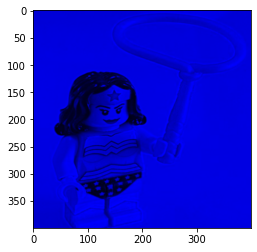

In [ ]:
image = cv.imread("/content/drive/MyDrive/Ifes/2022 2/Processamento Digital de Imagens/BaseExit/QUEM5.png")
ImageRed = image.copy()
ImageRed[:,:,1] = 0
ImageRed[:,:,0] = 0
plt.imshow(ImageRed)

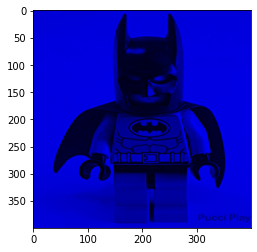

In [ ]:
image2 = cv.imread("/content/drive/MyDrive/Ifes/2022 2/Processamento Digital de Imagens/BaseExit/Batman.png")
ImageRed2 = image2.copy()
ImageRed2[:,:,1] = 0
ImageRed2[:,:,0] = 0
plt.imshow(ImageRed2)

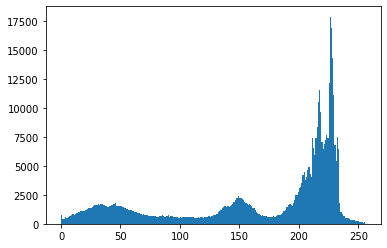

In [ ]:
hist1 = plt.hist(image2.ravel(), 256,[0,256]);plt.show()

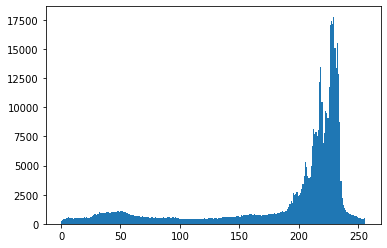

In [ ]:
hist2 = plt.hist(image.ravel(), 256,[0,256]);plt.show()

In [ ]:
return_intersection(hist1,hist2)

TypeError: ignored

In [ ]:
hist = plt.hist(image.ravel(), 256,[0,256]);

In [ ]:
return_intersection(hist1,hist2)

In [ ]:
resultado = return_intersection(image2, image)
print(resultado)
if resultado > 0.87:
  print("é ele")
else:
  print("não é")

In [ ]:
((22.37686607052653/28.294892806025246)+(20.05844147018705/28.294892806025246)+(24.095557121643754/28.294892806025246)+(21.14045569210355/28.294892806025246)+(28.294892806025246/28.294892806025246)+(23.17741829224462/28.294892806025246)+(19.969214233320194/28.294892806025246)+(18.744575449643342/28.294892806025246))

In [ ]:
((22.37686607052653/28.294892806025246)+(20.05844147018705/28.294892806025246)+(24.095557121643754/28.294892806025246)+(21.14045569210355/28.294892806025246)+(28.294892806025246/28.294892806025246)+(23.17741829224462/28.294892806025246)+(19.969214233320194/28.294892806025246)+(18.744575449643342/28.294892806025246))/6.285848911144152

In [ ]:
(18.744575449643342/28.294892806025246)/6.28

In [ ]:
(24.095557121643754/28.294892806025246)/6.28

In [ ]:
(28.294892806025246/28.294892806025246)/6.28